<a href="https://colab.research.google.com/github/jameVee/Lottery-Scheduling/blob/main/Lottery_Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lottery Scheduling**
ขั้นตอนการทำ
*   import library ที่ใช้งาน




In [ ]:
import random as rd
import matplotlib.pyplot as plt

*   กำหนดตัวแปรแต่ละค่า

In [ ]:
num_trial = 30
R_max = 1000
jobs_length = list(range(1,R_max+1))

*   สร้างฟังก์ชัน Average ในการเฉลี่ยค่า fitness

In [ ]:
def Average(lst):
    return sum(lst) / len(lst)

*   คำนวณหาค่า Avg fairness ของแต่ละ Job length

In [ ]:
all_avg_fairness = []
for i in range(0,R_max): 
  fairnesses = []
  for j in range(0,num_trial):
    num_jobA = 0
    num_jobB = 0
    finishTime_jobA = 0
    finishTime_jobB = 0
    time = 0
    while (num_jobA!=jobs_length[i]) and (num_jobB!=jobs_length[i]):
      num_rd = rd.random()
      if (num_rd <= 0.5 ) and (num_jobA < jobs_length[i]):
        time += 1
        num_jobA += 1

      if (num_rd > 0.5 ) and (num_jobB < jobs_length[i]):
        time += 1
        num_jobB += 1
      
      if num_jobA == jobs_length[i]:
        finishTime_jobA = time
      
      if num_jobB == jobs_length[i]:
        finishTime_jobB = time

    if num_jobA < jobs_length[i]:
      for z in range(num_jobA+1,jobs_length[i]+1):
        time += 1
      finishTime_jobA = time
      fairnesses.append(finishTime_jobB / finishTime_jobA) 
    if num_jobB < jobs_length[i]:
      for z in range(num_jobB+1,jobs_length[i]+1):
        time += 1
      finishTime_jobB = time
      fairnesses.append(finishTime_jobA / finishTime_jobB)
  all_avg_fairness.append(Average(fairnesses))
print(all_avg_fairness)

[0.5, 0.625, 0.7000000000000001, 0.75, 0.7499999999999999, 0.7888888888888891, 0.7690476190476191, 0.8208333333333333, 0.8111111111111108, 0.8399999999999997, 0.8106060606060606, 0.8194444444444444, 0.8205128205128205, 0.8309523809523811, 0.8466666666666665, 0.8822916666666667, 0.8813725490196078, 0.8712962962962961, 0.8666666666666666, 0.9000000000000002, 0.8817460317460316, 0.9045454545454548, 0.882608695652174, 0.8923611111111112, 0.9026666666666668, 0.8871794871794871, 0.8907407407407408, 0.8654761904761906, 0.9143678160919538, 0.8944444444444444, 0.8795698924731181, 0.8942708333333333, 0.8979797979797982, 0.9191176470588235, 0.8933333333333331, 0.9092592592592593, 0.9004504504504506, 0.9140350877192984, 0.8999999999999998, 0.9158333333333335, 0.9243902439024393, 0.9257936507936506, 0.9155038759689922, 0.8984848484848484, 0.9122222222222222, 0.9282608695652173, 0.9276595744680853, 0.9041666666666666, 0.9173469387755103, 0.9103333333333335, 0.9235294117647057, 0.9243589743589742, 0.

*   plot กราฟดูความสัมพันธ์ระหว่าง Job Length กับ Fairness

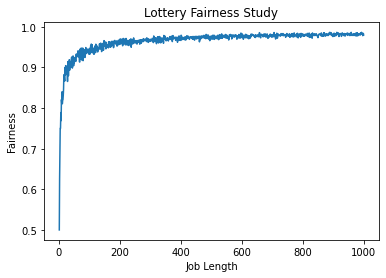

In [ ]:
plt.title('Lottery Fairness Study')
plt.xlabel('Job Length')
plt.ylabel('Fairness')
plt.plot(jobs_length,all_avg_fairness)
plt.show()
